In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [2]:
df["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [3]:
# Note1: Regression model will be applied

In [4]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(158, 12)

In [5]:
df.shape

(158, 12)

# EDA
  # 1. Null/NaN

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

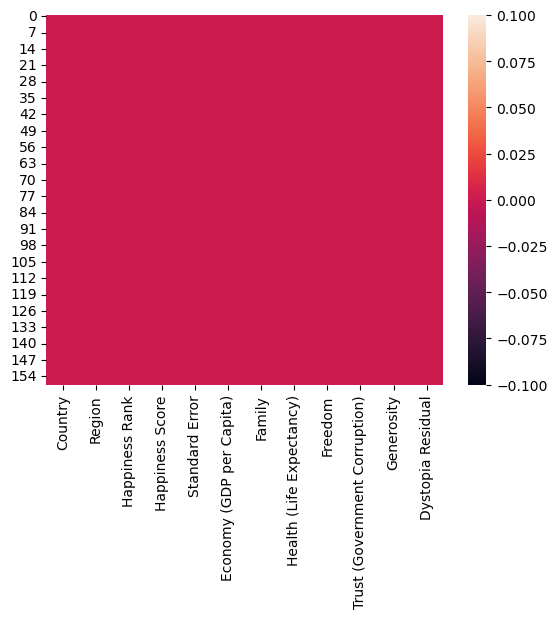

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
# Note2: it has Country, Region as object

In [10]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

In [11]:
#Note3: Zero null values

In [12]:
df.nunique().to_frame("No of unique values")

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [13]:
# There are 10 regions and rest are unique values.

In [14]:
df.shape

(158, 12)

In [15]:
columns_to_drop=["Happiness Rank",] # It can be dropped as it is ranking based on Happiness score
df = df.drop(columns_to_drop, axis=1)
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(158, 11)

In [17]:
df.shape

(158, 11)

# 2. Label Encoder

In [18]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(11)
memory usage: 13.7 KB


# 3. Skewness, Outliars

In [20]:
df.describe()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - "Economy (GDP per Capita)	", "Family"   --> Left Skewed
- Median (50%) < Mean - Slight deviation in "Region", "Trust (Government Corruption)","Generisity" -> Right Skewed
- Standard Dev for "Country" is high -> Outliars are present
- Percentile 75% and max : No major observations. It is there in "Country" but it is an object - outliars are present

In [21]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

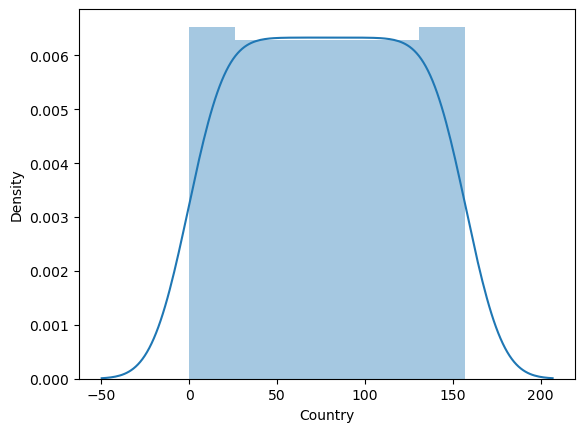

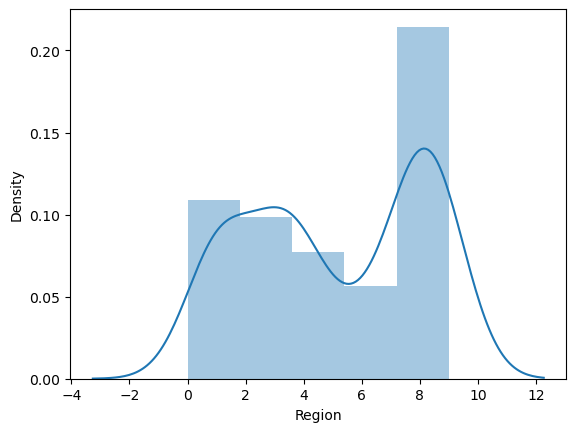

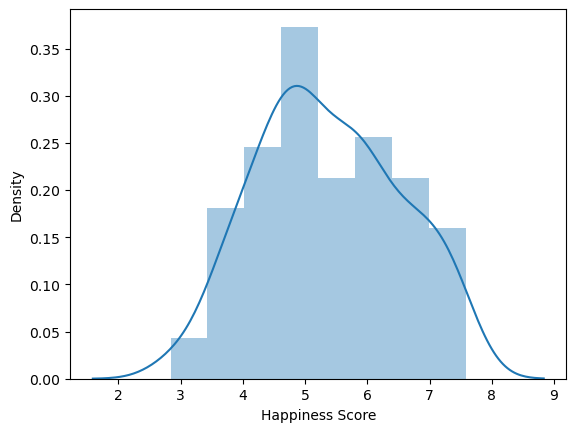

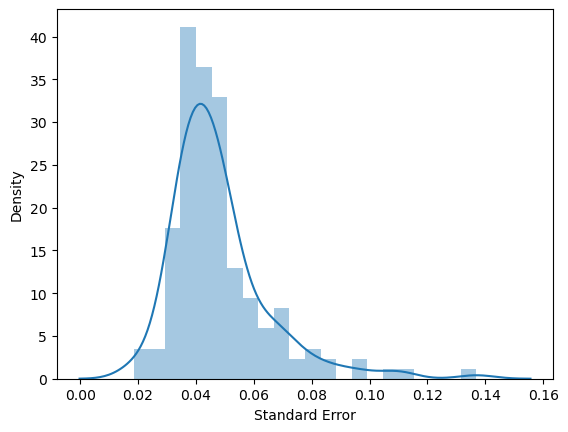

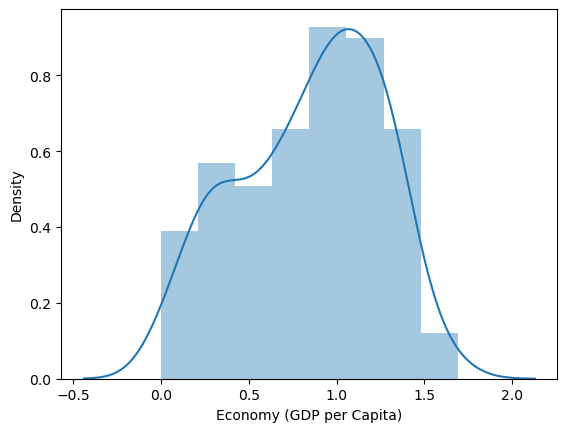

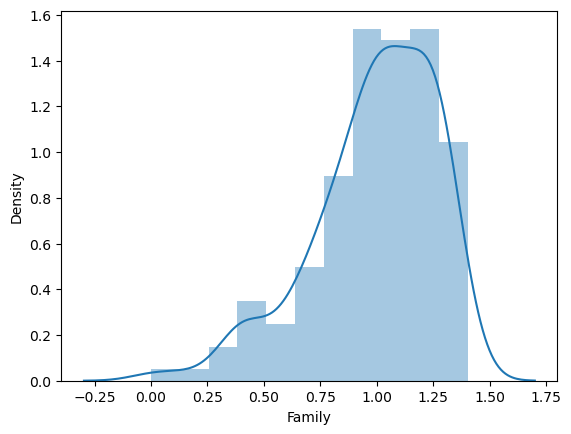

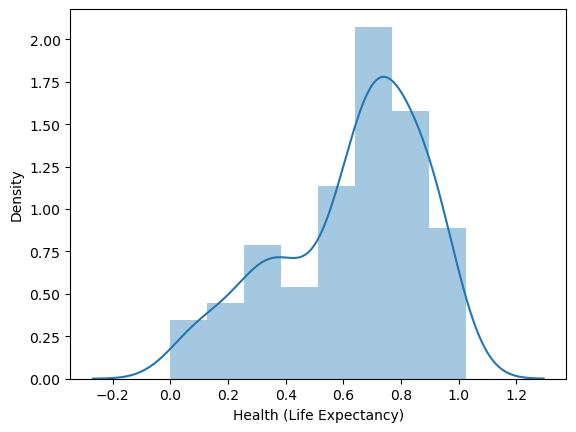

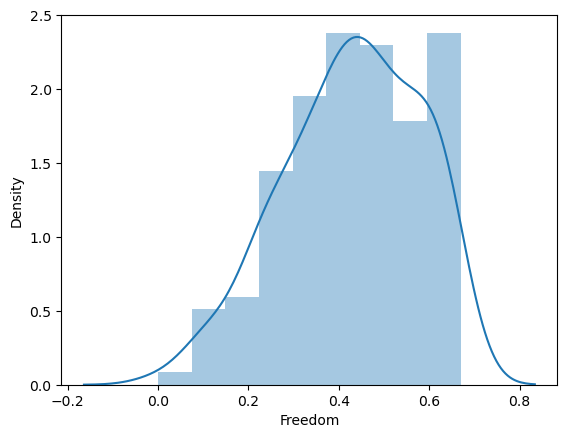

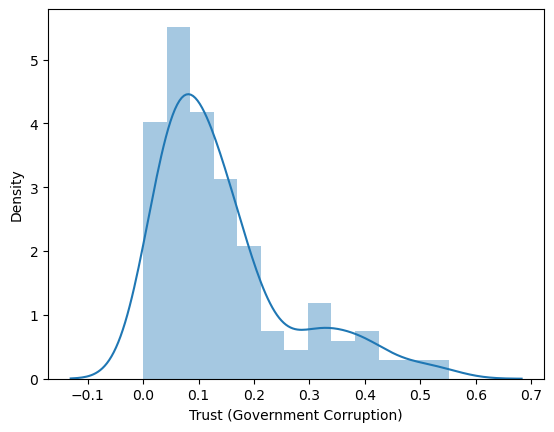

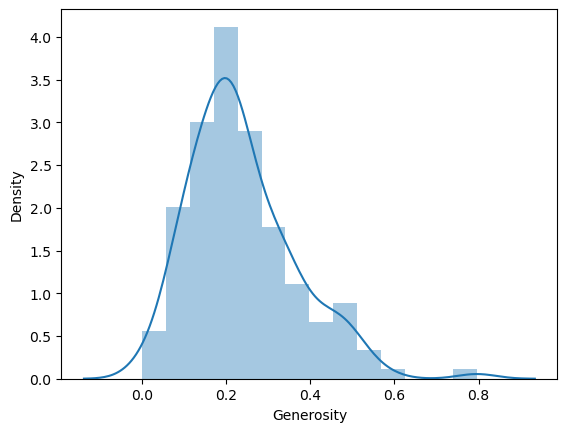

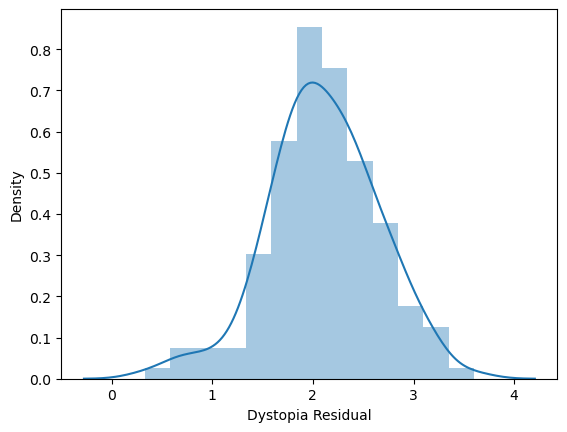

In [22]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

- Left Skewed: "Health","Family",
- Right Skewed: "Generisity", "Trust","Stad Error"

In [23]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [24]:
x = ['Standard Error', 'Trust (Government Corruption)', 'Generosity']

for i in x:
    df[i] = np.cbrt(df[i])   # Remove Skewness

In [25]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

Country                             Axes(0.125,0.653529;0.168478x0.226471)
Region                           Axes(0.327174,0.653529;0.168478x0.226471)
Happiness Score                  Axes(0.529348,0.653529;0.168478x0.226471)
Standard Error                   Axes(0.731522,0.653529;0.168478x0.226471)
Economy (GDP per Capita)            Axes(0.125,0.381765;0.168478x0.226471)
Family                           Axes(0.327174,0.381765;0.168478x0.226471)
Health (Life Expectancy)         Axes(0.529348,0.381765;0.168478x0.226471)
Freedom                          Axes(0.731522,0.381765;0.168478x0.226471)
Trust (Government Corruption)           Axes(0.125,0.11;0.168478x0.226471)
Generosity                           Axes(0.327174,0.11;0.168478x0.226471)
Dystopia Residual                    Axes(0.529348,0.11;0.168478x0.226471)
dtype: object

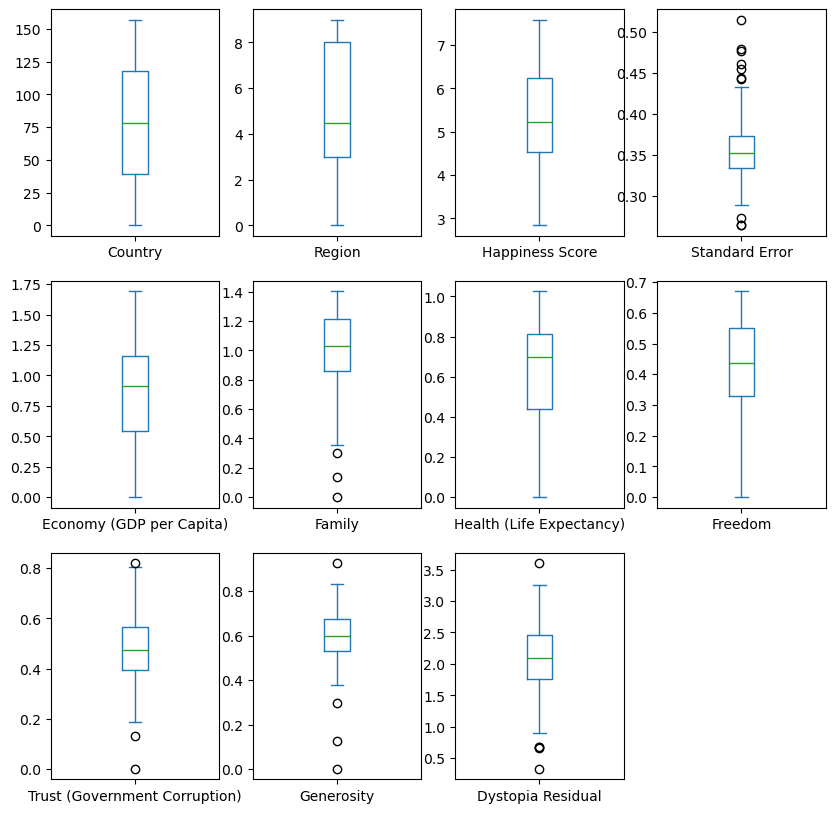

In [26]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

In [27]:
#Outliars observed in Standard Error, Generosoty, Trust, Dystopia,Family.

In [28]:
from scipy.stats import zscore
ol = ["Standard Error","Generosity","Trust (Government Corruption)","Dystopia Residual","Family"]
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)


Data loss rate 1.2658227848101267


# Data Loss is less than 1%

# 4. Co- Relation and Multicolinearity

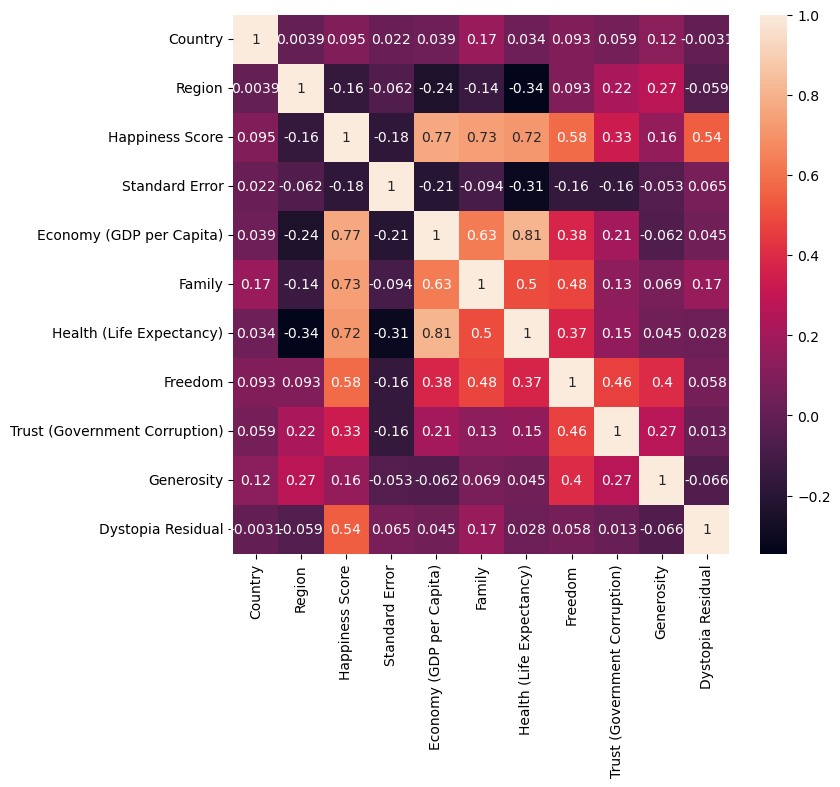

In [29]:
corr_hmap=df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : No Corelation- Low Corelation Worst - ["Generisity", "Std Error","Region","Country"]
- 0.3 or >-0.3 --> Others - ["Trust", "children"
- 0.5 or >-0.5 --> Mod Corelation - "Dystopia R","Freedom"
- 0.7 or >-0.7 --> High Corelation - "Health","Family","Economy"

In [30]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

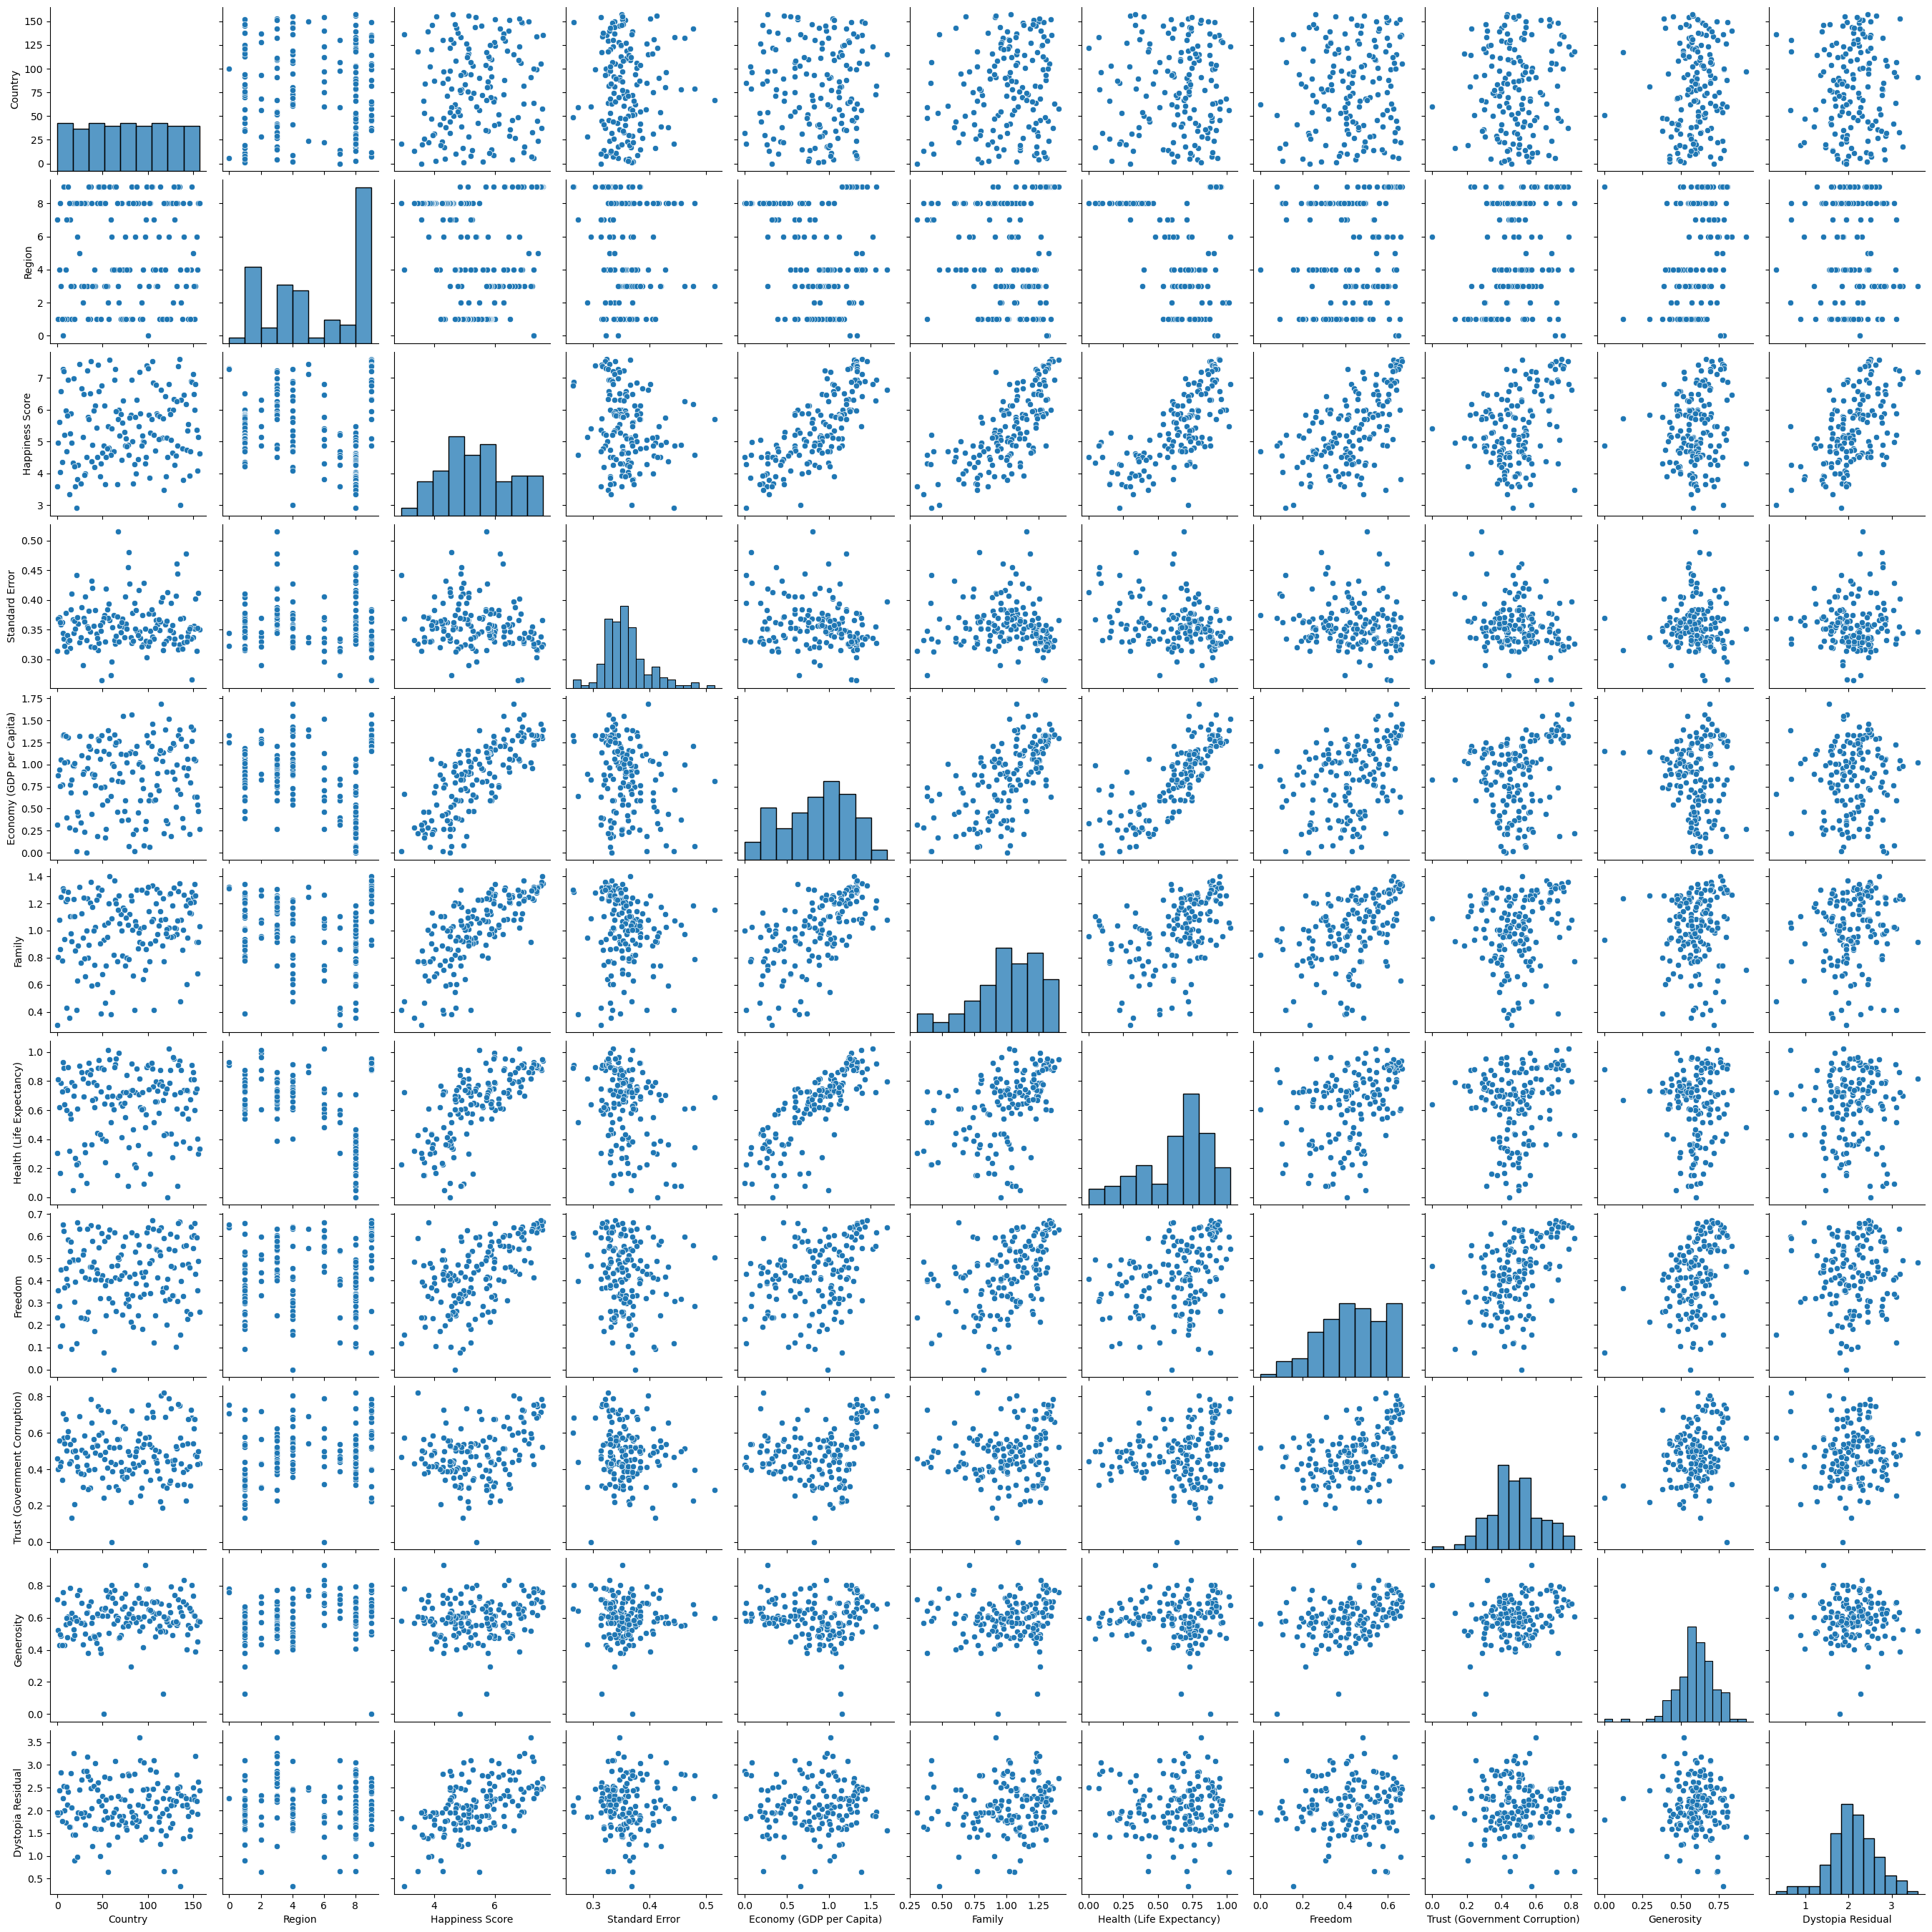

In [31]:
sns.pairplot(df1)

In [32]:
# No Correlation between "Happiness score" and "Country, Generosity, Standard Error"

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_x = ['Country', 'Region', 'Standard Error',
     'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
     'Freedom', 'Trust (Government Corruption)', 'Generosity',
     'Dystopia Residual']
x = df[x_x]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor                       features
0    4.155970                        Country
1    5.176678                         Region
2   32.455508                 Standard Error
3   22.018176       Economy (GDP per Capita)
4   28.188550                         Family
5   25.317091       Health (Life Expectancy)
6   16.453139                        Freedom
7   15.949640  Trust (Government Corruption)
8   32.708530                     Generosity
9   15.365147              Dystopia Residual


In [34]:
columns_to_drop=["Generosity","Standard Error"] # Least co-relation with output
df2 = df.drop(columns_to_drop, axis=1)
df2

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,135.0,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.748756,2.51738
1,58.0,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.521036,2.70201
2,37.0,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.784910,2.49204
3,105.0,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.714677,2.46531
4,24.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.690742,2.45176
...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,3.465,0.22208,0.77370,0.42864,0.59201,0.820269,0.67042
154,13.0,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.431066,1.63328
155,136.0,4.0,3.006,0.66320,0.47489,0.72193,0.15684,0.573940,0.32858
156,21.0,8.0,2.905,0.01530,0.41587,0.22396,0.11850,0.465116,1.83302


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_x = ['Country', 'Region','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
     'Freedom', 'Trust (Government Corruption)','Dystopia Residual']
x = df[x_x]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor                       features
0    3.998933                        Country
1    4.454927                         Region
2   19.531791       Economy (GDP per Capita)
3   25.630222                         Family
4   22.383218       Health (Life Expectancy)
5   14.907468                        Freedom
6   14.613612  Trust (Government Corruption)
7   11.438134              Dystopia Residual


# MODEL

## 1. Feature Scaling using Standard Scalarization

In [42]:
# to remove biasness. Standard Scaler consider Zero as mean and 1 as std dev value
y=df["Happiness Score"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.238770,1.300256,1.369621,1.320281,1.263408,1.577438,1.826993,0.758258
1,-0.449465,1.300256,1.135226,1.514458,1.289434,1.332456,0.260958,1.092857
2,-0.909893,1.300256,1.192861,1.361054,0.992229,1.469659,2.075620,0.712335
3,0.581016,1.300256,1.525130,1.251922,1.035145,1.605131,1.592625,0.663893
4,-1.194920,-0.040302,1.194876,1.221204,1.118054,1.360416,1.428028,0.639337
...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,-1.552987,-0.800520,-0.818610,1.087740,2.318782,-2.588925
154,-1.436096,0.965117,-1.392303,-2.346860,-1.263362,0.372033,-0.357762,-0.843967
155,1.260695,-0.375441,-0.455245,-1.901086,0.372199,-1.809238,0.624780,-3.208430
156,-1.260695,0.965117,-2.067566,-2.118467,-1.649648,-2.064472,-0.123602,-0.481985


## 2. Best random state value:

In [43]:
y.unique() # Will apply regression model

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.9935585288992101  at random state  107


# 3. Creating train test split

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# 4. Regression Algorithms and Cross Validation Score

R2_score:   LinearRegression()  is  0.9935585288992101
R2_score_Training Data:   LinearRegression()  is  98.65931364613887
error:
Mean Absolute error 0.07490595325108061
Mean Squared error 0.009428291581257965
Root Mean Squared error 0.09709939022083489


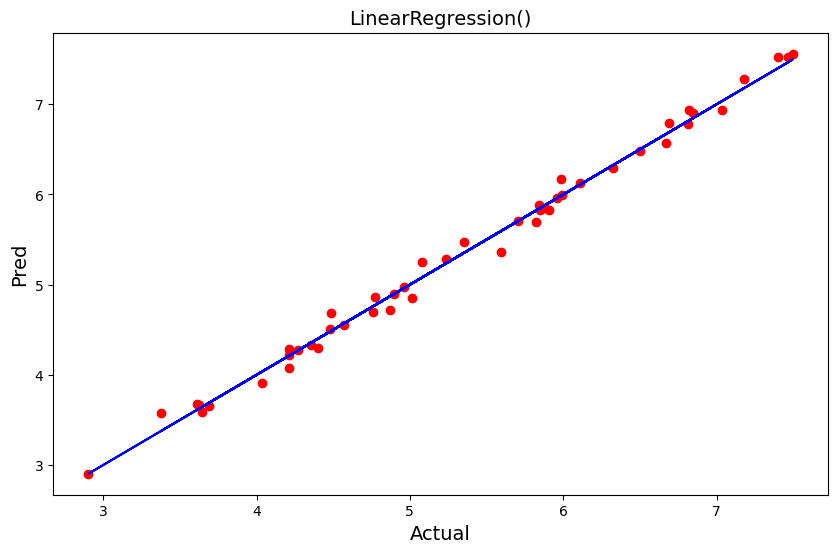

Cross Validation of:   LinearRegression()  is 
[0.68077477 0.76828284 0.49779321 0.63845981 0.88632739]
0.6943276018775852
Diff in Acc Score and Cross Val Score is -  29.923092702162492


R2_score:   RandomForestRegressor()  is  0.9168611718159206
R2_score_Training Data:   RandomForestRegressor()  is  98.5073202913927
error:
Mean Absolute error 0.2747335416666668
Mean Squared error 0.12168914547291698
Root Mean Squared error 0.3488397131533578


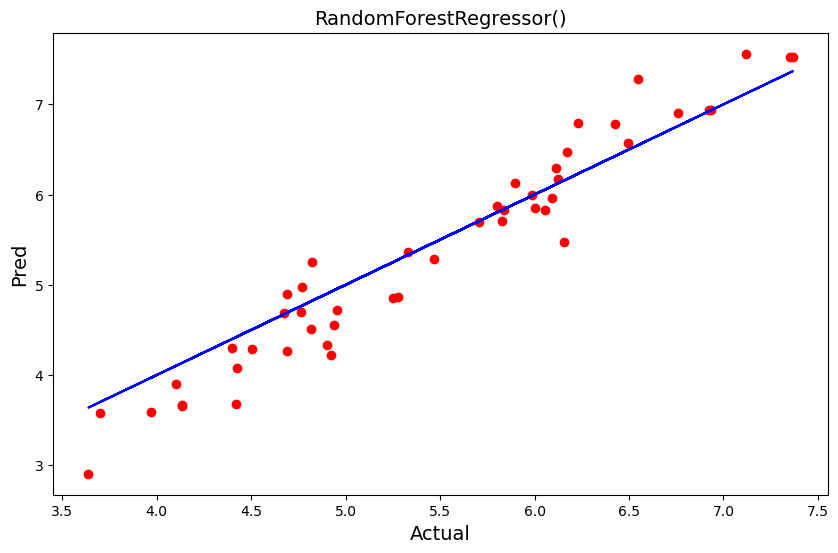

Cross Validation of:   RandomForestRegressor()  is 
[-7.72003467 -0.90531891 -1.0849822  -1.59197778 -5.39998357]
-3.3404594250796817
Diff in Acc Score and Cross Val Score is -  425.73205968956023


R2_score:   DecisionTreeRegressor()  is  0.8027253447817932
R2_score_Training Data:   DecisionTreeRegressor()  is  100.0
error:
Mean Absolute error 0.42783333333333334
Mean Squared error 0.28874816666666664
Root Mean Squared error 0.5373529256146901


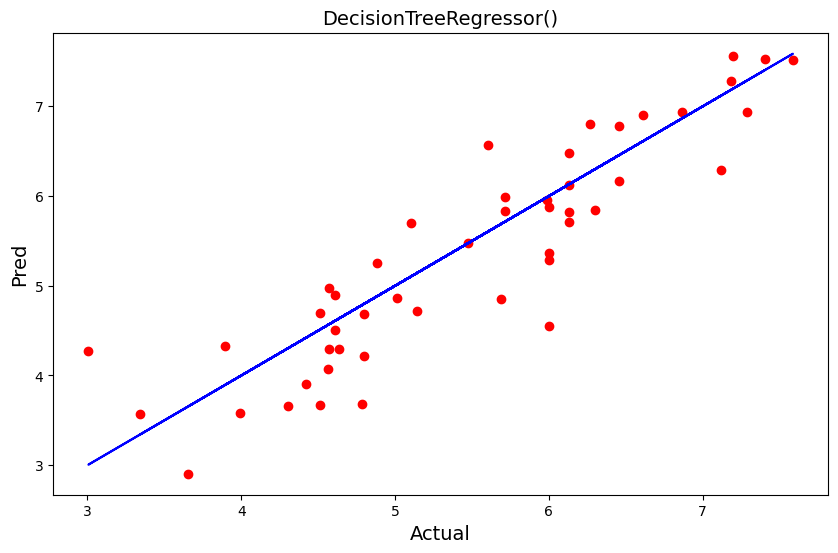

Cross Validation of:   DecisionTreeRegressor()  is 
[ -8.15143341  -7.68257487  -6.90787252 -10.32830086  -5.91492001]
-7.797020334620505
Diff in Acc Score and Cross Val Score is -  859.9745679402298


R2_score:   KNeighborsRegressor()  is  0.9186709061641176
R2_score_Training Data:   KNeighborsRegressor()  is  90.80493954849072
error:
Mean Absolute error 0.27972083333333325
Mean Squared error 0.11904026250000004
Root Mean Squared error 0.34502211885616846


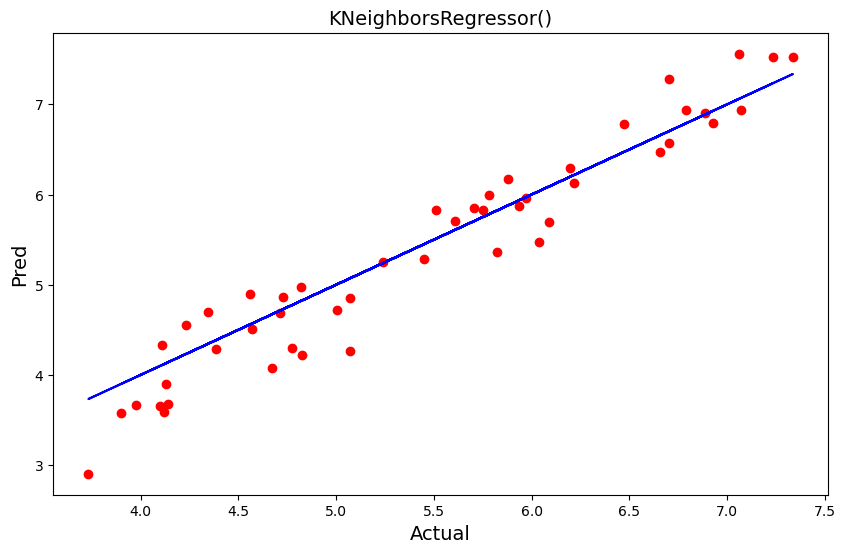

Cross Validation of:   KNeighborsRegressor()  is 
[-9.30430512 -3.04337961 -2.7637729  -8.30125512 -4.43821073]
-5.570184696327087
Diff in Acc Score and Cross Val Score is -  648.8855602491204


R2_score:   Lasso()  is  -0.00042170254578155486
R2_score_Training Data:   Lasso()  is  0.0
error:
Mean Absolute error 1.0368242424242424
Mean Squared error 1.4643033195730029
Root Mean Squared error 1.2100840134358453


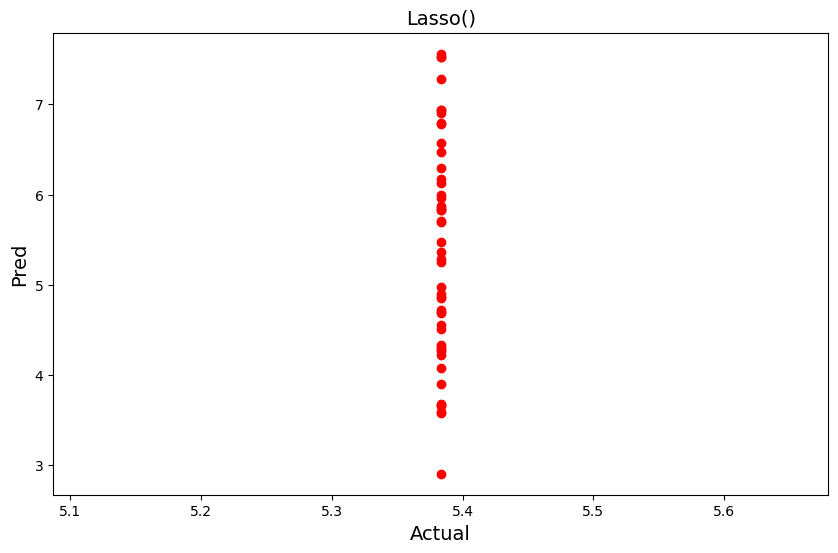

Cross Validation of:   Lasso()  is 
[-39.5383371  -12.7569766   -0.20386211 -30.73906532 -23.65659767]
-21.378967758942114
Diff in Acc Score and Cross Val Score is -  2137.854605639633


R2_score:   Ridge()  is  0.9935154767379967
R2_score_Training Data:   Ridge()  is  98.65643815548569
error:
Mean Absolute error 0.07597510730195789
Mean Squared error 0.009491306430315325
Root Mean Squared error 0.09742333616908899


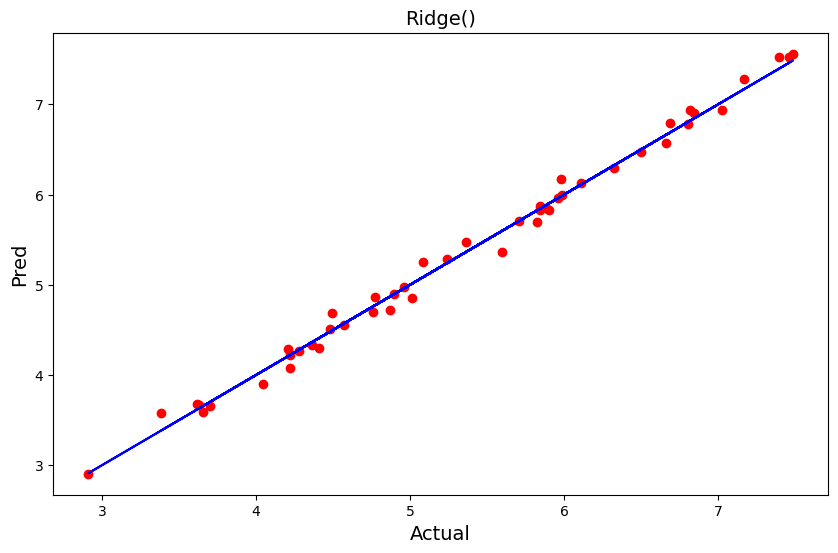

Cross Validation of:   Ridge()  is 
[0.62929762 0.77125995 0.49730201 0.64212988 0.88072583]
0.6841430568146472
Diff in Acc Score and Cross Val Score is -  30.93724199233495


R2_score:   SVR()  is  0.9380790807243657
R2_score_Training Data:   SVR()  is  97.33309402176143
error:
Mean Absolute error 0.2077388352942935
Mean Squared error 0.09063278756907407
Root Mean Squared error 0.30105279864016227


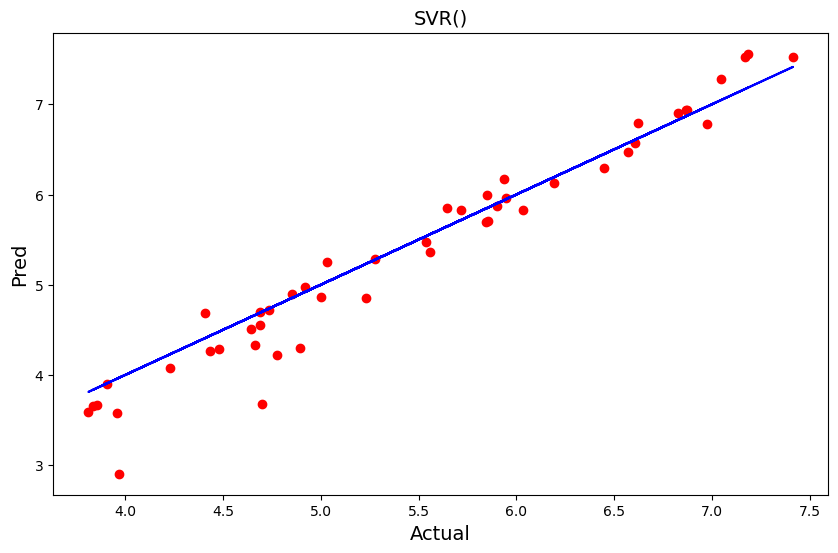

Cross Validation of:   SVR()  is 
[-9.68717496 -0.04003112  0.54666251 -0.46883095 -6.94247762]
-3.3183704244402277
Diff in Acc Score and Cross Val Score is -  425.64495051645935


R2_score:   ExtraTreesRegressor()  is  0.9356573949562125
R2_score_Training Data:   ExtraTreesRegressor()  is  100.0
error:
Mean Absolute error 0.24076708333333355
Mean Squared error 0.0941773753166667
Root Mean Squared error 0.306883325250276


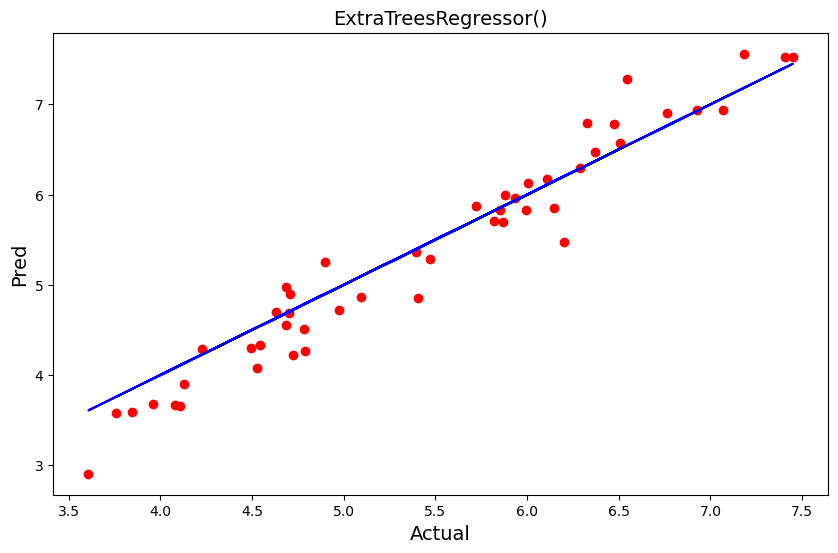

Cross Validation of:   ExtraTreesRegressor()  is 
[-6.69814572 -0.28937505 -0.70009296 -2.04726505 -5.03172492]
-2.9533207382958766
Diff in Acc Score and Cross Val Score is -  388.8978133252089




In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB


lr= LinearRegression()
rfc=RandomForestRegressor()
dtr=DecisionTreeRegressor()
kn=KNN()
ls=Lasso()
rd=Ridge()
svr=SVR()
etr=ExtraTreesRegressor()




model=[lr,rfc,dtr,kn,ls,rd,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    
    print("R2_score:  ",m," is " ,r2_score(y_test,predm))
    print("R2_score_Training Data:  ",m," is " ,r2_score(y_train,pred_train)*100)
    print("error:")
    
    print("Mean Absolute error",mean_absolute_error(y_test,predm))
    print("Mean Squared error",mean_squared_error(y_test,predm))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predm)))
   
    plt.figure(figsize=(10,6))
    plt.scatter(x=predm,y=y_test,color="r")
    plt.plot(predm,predm,color="b")
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Pred",fontsize=14)
    plt.title(m,fontsize=14)
    plt.show()
    score = cross_val_score(m,x,y)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",(r2_score(y_test,predm)-score.mean())*100)
    print("\n")

## Linear Regression and Ridge are the best model with least error

# 5. Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "solver": ["auto","svd","cholesky","lsqr","sparse_cg"]
}

# Instantiate GridSearchCV without "precomputed" kernel
GCV = GridSearchCV(Ridge(),parameters, cv=5)
GCV.fit(x_train, y_train)
print(GCV.best_params_)

{'solver': 'sparse_cg'}


In [52]:
Final_model = Ridge(solver="sparse_cg")
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

print("R2_score:",r2_score(y_test,pred))

print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

99.35154767380021
R2_score: 0.9935154767380021
Mean Absolute error 0.07597510730193112
Mean Squared error 0.009491306430307406
Root Mean Squared error 0.09742333616904836


# 6. Regularization

In [55]:
from sklearn.datasets import make_regression
reg = [0.1, .01, .001,1,10]

for C in reg:
    reg_r = Ridge(solver="sparse_cg", alpha=C)
    reg_r.fit(x_train,y_train)
    pred=reg_r.predict(x_test)
    acc=r2_score(y_test,pred)
    print("Regularization of Ridge with:  ",C," is " )
    print(acc*100)
    print("R2_score:",r2_score(y_test,pred))
    print("Mean Absolute error",mean_absolute_error(y_test,pred))
    print("Mean Squared error",mean_squared_error(y_test,pred))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n")

Regularization of Ridge with:   0.1  is 
99.35569336968541
R2_score: 0.9935569336968542
Mean Absolute error 0.07496438625767828
Mean Squared error 0.009430626456740263
Root Mean Squared error 0.0971114125978006


Regularization of Ridge with:   0.01  is 
99.35583972543273
R2_score: 0.9935583972543273
Mean Absolute error 0.07491178992646601
Mean Squared error 0.009428484268040382
Root Mean Squared error 0.09710038242993888


Regularization of Ridge with:   0.001  is 
99.35585160142926
R2_score: 0.9935585160142927
Mean Absolute error 0.07490653685154282
Mean Squared error 0.00942831044073236
Root Mean Squared error 0.09709948733506454


Regularization of Ridge with:   1  is 
99.35154767380021
R2_score: 0.9935154767380021
Mean Absolute error 0.07597510730193112
Mean Squared error 0.009491306430307406
Root Mean Squared error 0.09742333616904836


Regularization of Ridge with:   10  is 
99.09588030272852
R2_score: 0.9909588030272852
Mean Absolute error 0.0930325227608985
Mean Squared error 

In [56]:
#Regularization of SVR with .01 has best results with reduced errors

In [58]:
from sklearn.datasets import make_regression
reg_r = Ridge(solver="sparse_cg", alpha=.01)
reg_r.fit(x_train,y_train)
pred=reg_r.predict(x_test)
acc=r2_score(y_test,pred)
print("Regularization of Ridge with:  ",.01," is " )
print(acc*100)
print("R2_score:",r2_score(y_test,pred))
print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))
print("\n")

Regularization of Ridge with:   0.01  is 
99.35583972543273
R2_score: 0.9935583972543273
Mean Absolute error 0.07491178992646601
Mean Squared error 0.009428484268040382
Root Mean Squared error 0.09710038242993888




# Saving the Model

In [59]:
import joblib # save as *.pkl
joblib.dump(reg_r,"Happiness_Score.pkl")

['Happiness_Score.pkl']